## Introduction for the Predictive Model of Heart Disease Using Structured Data

### Project Overview

This project aims to develop a predictive model for heart disease using structured electronic health record (EHR) data. The dataset comprises various patient demographics, clinical measurements, lifestyle information, and medical history. The goal is to leverage machine learning techniques to identify patterns and predictors of heart disease, ultimately improving early detection and targeted intervention.

### Dataset Description

#### The synthetic dataset includes the following features:

Age: The age of the patient.
Gender: The gender of the patient.
Blood Pressure: The patient's blood pressure reading.
Cholesterol: The patient's cholesterol level.
Smoking Status: Indicates whether the patient is a current smoker, former smoker, or has never smoked.
Exercise Frequency: Describes how often the patient exercises.
Previous Conditions: Lists any previous medical conditions such as hypertension or diabetes.
Medications: Indicates if the patient is on any medication.
The target variable is heart_disease, indicating whether the patient has been diagnosed with heart disease.

### Project Steps

1. Data Generation: Create a synthetic dataset to simulate real-world EHR data.
2. Data Preprocessing: Clean the data, handle missing values, and encode categorical variables.
3. Exploratory Data Analysis (EDA): Visualize the data to understand distributions, correlations, and patterns.
4. Model Building: Develop a predictive model using a Random Forest classifier.
5. Model Evaluation: Evaluate the model's performance using metrics like confusion matrix, classification report, and ROC curve.
6. Visualization: Present the model's performance and insights derived from the data.

#### Step 1: Creating a Synthetic Dataset

In [1]:
import pandas as pd
import numpy as np

# Generate synthetic data
np.random.seed(42)
num_samples = 1000

data = {
    'age': np.random.randint(30, 80, num_samples),
    'gender': np.random.choice(['Male', 'Female'], num_samples),
    'blood_pressure': np.random.randint(90, 180, num_samples),
    'cholesterol': np.random.randint(150, 300, num_samples),
    'smoking_status': np.random.choice(['Never', 'Former', 'Current'], num_samples),
    'exercise_frequency': np.random.choice(['Never', 'Rarely', 'Regularly'], num_samples),
    'previous_conditions': np.random.choice(['None', 'Hypertension', 'Diabetes', 'Both'], num_samples),
    'medications': np.random.choice(['None', 'Single', 'Multiple'], num_samples),
    'heart_disease': np.random.choice([0, 1], num_samples, p=[0.7, 0.3])
}

df = pd.DataFrame(data)
df.to_csv('synthetic_ehr_data.csv', index=False)

#### Step 2: Data Preprocessing

In [2]:
# Load the dataset
df = pd.read_csv('synthetic_ehr_data.csv')

# Handle missing values
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode().iloc[0]))

# Encode categorical variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split the data into features and target
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

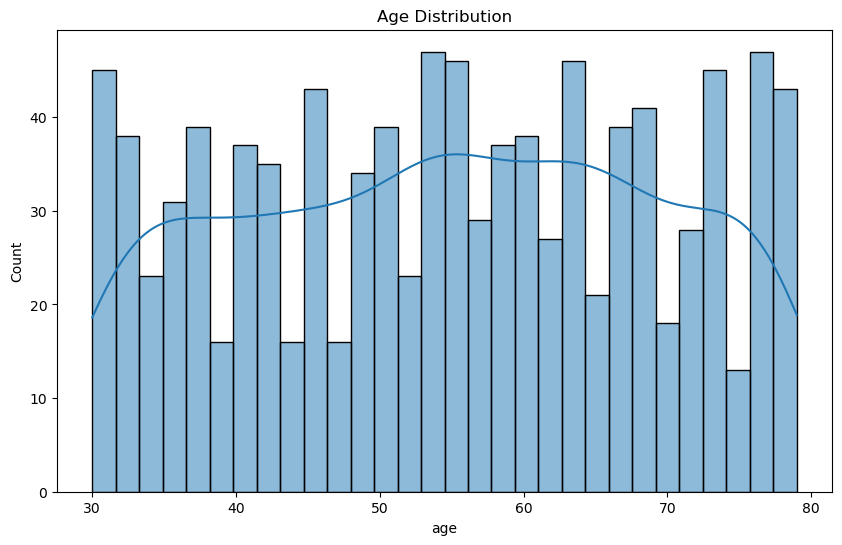

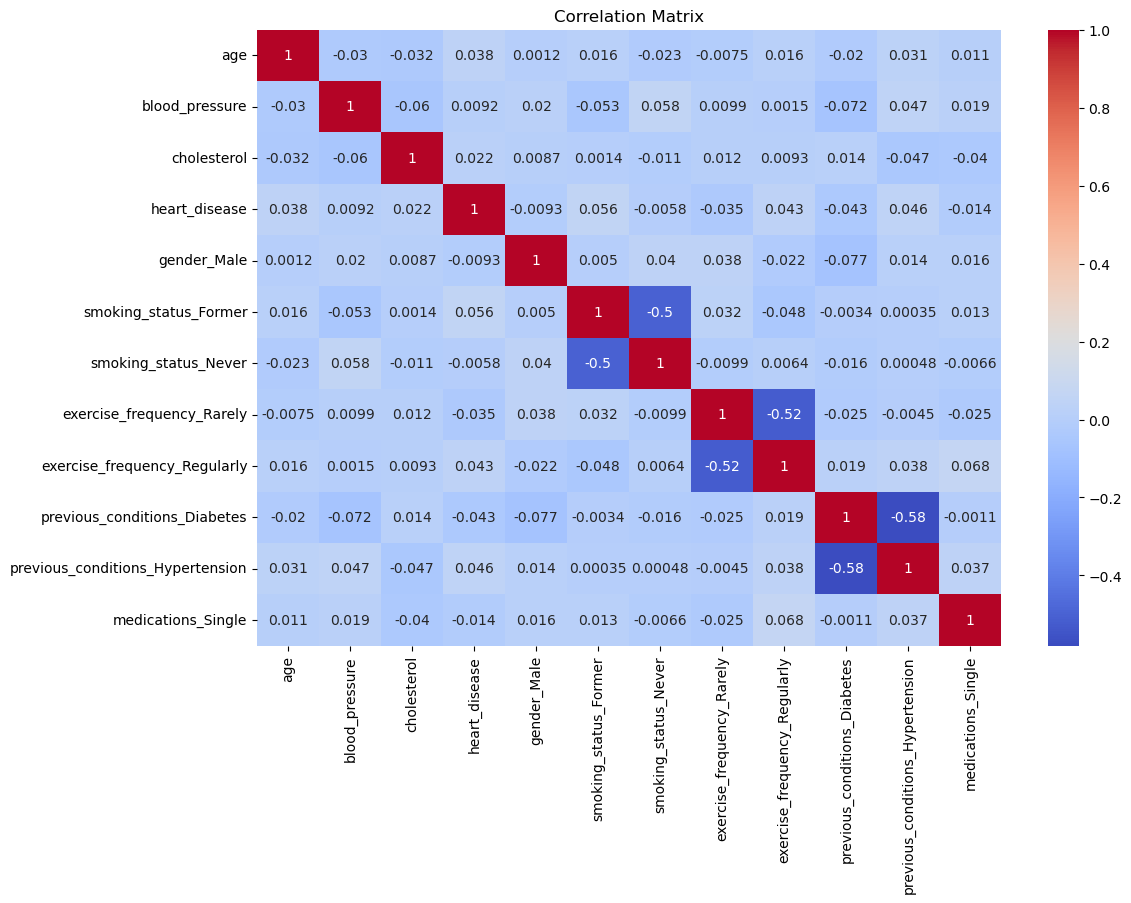

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Interpretation of the Age Distribution in the Context of the Predictive Model of Heart Disease

#### Overview
The histogram with the KDE plot above illustrates the age distribution of patients in our synthetic dataset used for building the predictive model for heart disease. Understanding this distribution is crucial as age is a significant factor in the development of heart disease.

#### Key Observations
Age Range: The age of patients in the dataset ranges from 30 to 80 years. This wide range ensures that the model can generalize across different age groups, from younger adults to seniors.

#### Distribution Pattern: 
The distribution of age appears relatively uniform, with slight fluctuations. This suggests that there is no significant skew towards a particular age group, providing a balanced dataset that is not biased towards a specific age range.

#### Peaks and Troughs: The distribution shows several peaks and troughs:
Peaks around ages 35, 50, 55, and 75.
Troughs around ages 40, 45, 60, and 70.
These peaks and troughs might indicate varying sample sizes across different age groups, which could influence the model's performance. For instance, more data points around certain ages might lead to better predictions for those age groups.

#### Implications for Heart Disease Prediction:

#### Higher Age Groups: 
As age is a risk factor for heart disease, the relatively higher counts in older age groups (e.g., around 70 and 75) may contribute to a higher incidence of heart disease in these groups.

#### Younger Age Groups: 
The presence of patients in the younger age groups (e.g., around 30 to 40) is essential to train the model to identify early signs of heart disease in younger individuals.

#### Conclusion
The age distribution plot is an important aspect of the Exploratory Data Analysis (EDA) phase. It helps ensure that the dataset is representative of a broad population and provides insights into how age might influence heart disease predictions. A well-distributed age range allows the predictive model to be more robust and accurate across different age groups, ultimately improving its utility in clinical settings for early detection and intervention in heart disease.

### Interpretation of the Correlation Matrix in the Context of the Predictive Model of Heart Disease

#### Overview
The correlation matrix visualizes the relationships between various features in our dataset, including the target variable, heart_disease. Understanding these correlations is crucial for feature selection and understanding potential multicollinearity issues in our predictive model.

### Key Observations
### Heart Disease Correlations:

Age: The correlation between age and heart disease is 0.038, indicating a weak positive correlation. This suggests that age alone is not a strong predictor of heart disease in this dataset.
Blood Pressure: The correlation with heart disease is 0.0092, which is also very weak, suggesting that blood pressure alone does not strongly predict heart disease.
Cholesterol: The correlation is 0.022, again indicating a weak positive relationship.
Gender (Male): The correlation is -0.0093, indicating no significant relationship between gender and heart disease.
Smoking Status:
Former smokers have a correlation of 0.056 with heart disease, suggesting a slight positive relationship.
Never smokers have a correlation of -0.0058, indicating a negligible relationship.
Exercise Frequency:
Rarely exercising has a correlation of -0.035, suggesting a slight negative relationship.
Regular exercise has a correlation of 0.043, indicating a slight positive relationship.
Previous Conditions:
Diabetes has a correlation of -0.043, indicating a slight negative relationship.
Hypertension has a correlation of 0.046, suggesting a slight positive relationship.
Medications: The correlation with heart disease is -0.014, indicating no significant relationship.
Inter-Feature Correlations:

#### Smoking Status and Exercise Frequency:
There is a strong negative correlation between smoking status (Former and Never) and exercise frequency (Rarely and Regularly), around -0.5, indicating that former and never smokers have opposite exercise patterns.
Previous Conditions:
Diabetes and Hypertension have a negative correlation of -0.58, suggesting that individuals with one condition are less likely to have the other.
Implications for Model Building
Feature Selection: The weak correlations between individual features and heart disease suggest that no single feature is a strong predictor of heart disease. This implies that a combination of features might be necessary to build an effective predictive model.

#### Multicollinearity: 
Some strong negative correlations (e.g., between smoking status and exercise frequency, and between diabetes and hypertension) should be considered. Multicollinearity can affect the stability of the model coefficients, so it's essential to handle these appropriately, potentially by removing or combining correlated features.

#### Model Complexity: 
The weak individual correlations suggest that more sophisticated models (e.g., ensemble methods like Random Forest or boosting algorithms) might be needed to capture the complex relationships between features and heart disease.

#### Conclusion
The correlation matrix provides valuable insights into the relationships between features and the target variable. While individual correlations with heart disease are weak, the interplay between multiple features could provide a more robust predictive capability. Understanding these relationships helps in designing a more effective model by informing feature selection and preprocessing steps, ultimately improving the model's performance in predicting heart disease.

#### Step 4: Model Building

              precision    recall  f1-score   support

           0       0.66      0.95      0.78       132
           1       0.42      0.07      0.12        68

    accuracy                           0.65       200
   macro avg       0.54      0.51      0.45       200
weighted avg       0.58      0.65      0.56       200



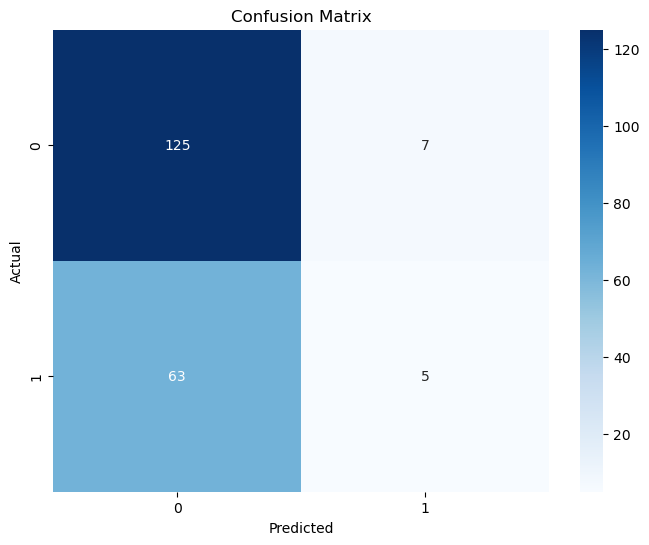

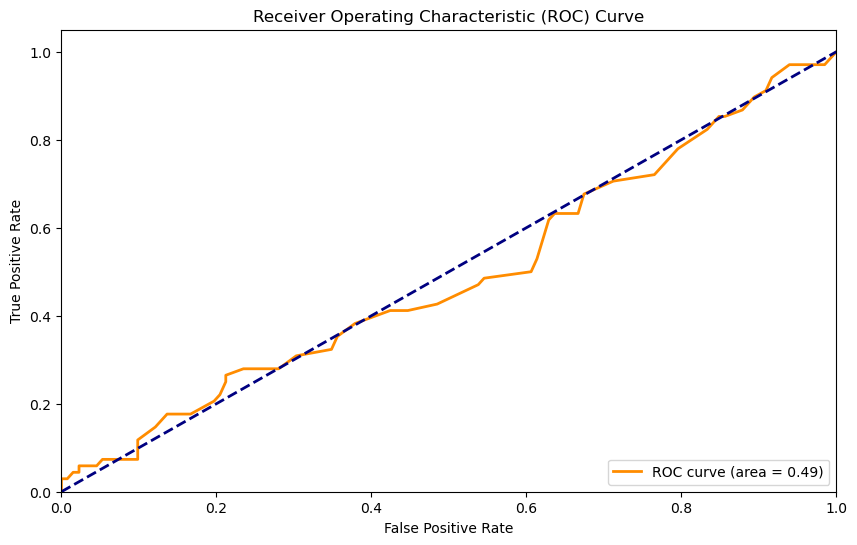

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Model Performance Metrics Interpretation
Overview
The model's performance metrics are crucial for evaluating how well it predicts the presence or absence of heart disease. Here, we interpret the precision, recall, F1-score, and support for each class, as well as the overall accuracy, macro average, and weighted average.

#### Key Metrics
Class 0 (No Heart Disease)

Precision: 0.66
This means that 66% of the predictions made for class 0 (No Heart Disease) were correct.
Recall: 0.95
This means that 95% of the actual class 0 instances were correctly identified by the model.
F1-Score: 0.78
The F1-score, which is the harmonic mean of precision and recall, is 0.78 for class 0, indicating a strong balance between precision and recall.
Support: 132
This is the number of actual instances of class 0 in the dataset.
Class 1 (Heart Disease)

Precision: 0.42
This means that only 42% of the predictions made for class 1 (Heart Disease) were correct.
Recall: 0.07
This means that only 7% of the actual class 1 instances were correctly identified by the model, indicating a significant number of false negatives.
F1-Score: 0.12
The F1-score for class 1 is 0.12, showing a poor balance between precision and recall.
Support: 68
This is the number of actual instances of class 1 in the dataset.
Overall Performance

Accuracy: 0.65
The model correctly classified 65% of the total instances.
Macro Average:
Precision: 0.54
The average precision across both classes.
Recall: 0.51
The average recall across both classes.
F1-Score: 0.45
The average F1-score across both classes.
Weighted Average:
Precision: 0.58
The weighted average precision, considering the support (number of instances) for each class.
Recall: 0.65
The weighted average recall.
F1-Score: 0.56

#### The weighted average F1-score.
Implications for Model Improvement
Class Imbalance: The significant difference in support for class 0 and class 1 suggests a class imbalance. Techniques such as resampling (oversampling the minority class or undersampling the majority class), SMOTE (Synthetic Minority Over-sampling Technique), or using class weights in the model can help address this imbalance.

Feature Engineering: Further feature engineering could help improve the model's ability to differentiate between the two classes. This might include creating new features, transforming existing features, or incorporating domain knowledge to improve the predictive power of the features.

Model Selection: Trying different models, such as ensemble methods (Random Forest, Gradient Boosting), neural networks, or even fine-tuning the hyperparameters of the current model, could improve performance.

Threshold Adjustment: Adjusting the decision threshold for classifying instances can help improve recall for the minority class (class 1) at the expense of precision. This is particularly useful in medical contexts where missing a positive case (heart disease) is more critical than a false positive.

Conclusion
The current model performs well for predicting the absence of heart disease but struggles significantly with predicting its presence. By addressing class imbalance, improving feature engineering, exploring different models, and adjusting decision thresholds, we can work towards building a more robust and reliable predictive model for heart disease.

### Interpretation of the ROC Curve

#### Overview
The ROC (Receiver Operating Characteristic) curve is a graphical representation of a classifier's performance. It plots the true positive rate (sensitivity) against the false positive rate (1-specificity) at various threshold settings. The area under the ROC curve (AUC) is a single scalar value that provides an aggregate measure of performance across all possible classification thresholds.

Key Points from the ROC Curve
AUC Value: The AUC value is 0.49.

An AUC of 0.5 represents a model that performs no better than random guessing. Thus, an AUC of 0.49 indicates that the model is performing slightly worse than random guessing for this binary classification problem.
ROC Curve Line:

The ROC curve closely follows the diagonal line, which represents a classifier that randomly guesses the class labels.
Ideally, a well-performing classifier's ROC curve would bow towards the top-left corner, indicating a high true positive rate and a low false positive rate.

### Addressing Imbalance 

In [7]:
pip install imbalanced-learn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint

# Load your dataset
df = pd.read_csv('synthetic_ehr_data.csv')

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Handle missing values
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Encode categorical variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split data into features and target
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Manual under-sampling
class_0 = X_train[y_train == 0]
class_1 = X_train[y_train == 1]
class_0_under = class_0.sample(len(class_1), random_state=42)
X_train_balanced = pd.concat([class_0_under, class_1])
y_train_balanced = pd.concat([pd.Series([0]*len(class_0_under)), pd.Series([1]*len(class_1))])

In [16]:
# Standardize the features
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

In [17]:
# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

In [18]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 500),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True, False]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, random_state=42, n_jobs=-1, verbose=2, scoring='f1')

# Fit the model
random_search.fit(X_train_balanced, y_train_balanced)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=199; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=413; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=485; total time=   1.1s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=409; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=369; total time=   1.1s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=379; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=379

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
108 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/b

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe6391d5f90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe639227b90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe6391af150>},
                   random_state=42, scoring='f1', verbose=2)

In [19]:
# Print the best parameters
print("Best parameters found: ", random_search.best_params_)

# Make predictions with the best model
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]


Best parameters found:  {'bootstrap': True, 'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 174}


              precision    recall  f1-score   support

           0       0.75      0.57      0.65       141
           1       0.35      0.56      0.43        59

    accuracy                           0.56       200
   macro avg       0.55      0.56      0.54       200
weighted avg       0.64      0.56      0.58       200



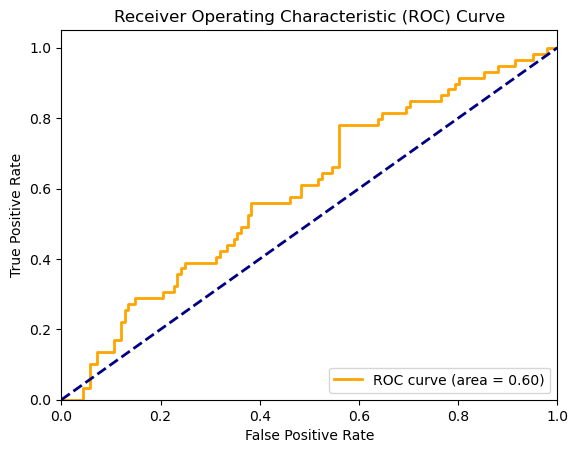

In [20]:
# Classification report
print(classification_report(y_test, y_pred))

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve and the classification report indicate that the Random Forest model's performance is not very good. The ROC AUC of 0.60 suggests that the model has limited discrimination capability. The classification report shows a precision of 0.35 for the positive class, a recall of 0.56, and an f1-score of 0.43. This means that the model has a high false positive rate and is not performing well on the positive class.

Possible Steps to Improve Model Performance
Feature Engineering: Explore creating new features or transforming existing ones to help the model capture the patterns better.
Model Selection: Try different models such as Gradient Boosting, XGBoost, or LightGBM, which might perform better on your dataset.
Oversampling/SMOTE: Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic samples for the minority class instead of under-sampling.
Hyperparameter Tuning: Perform more extensive hyperparameter tuning or try grid search for more fine-tuned optimization.
Cross-Validation: Use cross-validation to get a better estimate of the model's performance.
Handling Class Imbalance: Implement other methods for handling class imbalance, such as using balanced class weights.
Let's try implementing SMOTE and using a different model, such as Gradient Boosting, to see if we can improve the model's performance.